What is XGBoost?

XGBoost is an optimized gradient boosting algorithm designed for speed and performance. It is widely used in ML competitions (e.g., Kaggle) due to its efficiency and scalability.


Key Features of XGBoost

Boosted Trees Algorithm: Uses gradient boosting to improve weak learners (decision trees).

Regularization: Has L1 (Lasso) and L2 (Ridge) regularization to prevent overfitting.

Parallel Processing: Supports multi-threading, making training very fast.

Handling Missing Values: Automatically learns the best direction for missing values.

Tree Pruning: Uses "max_depth" instead of pre-pruning, which makes training efficient.

Supports Distributed Computing: Can run on Hadoop, Spark, and GPUs.

Core Concepts

1. Boosting

A sequential learning method where weak learners (shallow decision trees) are improved iteratively.

Each new tree corrects the errors made by previous trees.

2. Gradient Boosting

Models the residual errors and minimizes them using gradient descent.

In each step, new trees are added to predict the residuals.

3. Objective Function

Includes a loss function (e.g., log loss, squared error) and a regularization term.

4. Regularization

L1 and L2 penalties to prevent overfitting.

Helps improve model generalization.



XGBoost Key Functions

Here’s a breakdown of essential functions in XGBoost:

1. DMatrix

A specialized data structure optimized for XGBoost.

Efficient for memory usage and fast computation.

In [5]:
import xgboost as xgb
import numpy as np
import pandas as pd

# Create sample data
data = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
labels = np.array([0, 1, 0])

# Convert to DMatrix
dtrain = xgb.DMatrix(data, label=labels)

2. Training an XGBoost Model

In [10]:
# Define parameters
params = {
    "objective": "binary:logistic",  # Classification problem
    "eval_metric": "logloss",  # Loss function
    "eta": 0.1,  # Learning rate
    "max_depth": 3,  # Tree depth
}

# Train model
bst = xgb.train(params, dtrain, num_boost_round=50)

3. Model Prediction

In [7]:
# Make predictions
preds = bst.predict(dtrain)
print(preds)

[0.33924362 0.33924362 0.33924362]


4. Feature Importance

XGBoost allows feature importance visualization.

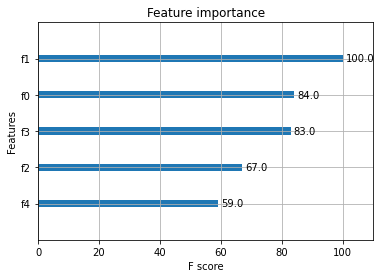

In [15]:
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# Sample dataset
X, y = np.random.rand(100, 5), np.random.randint(0, 2, 100)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBClassifier
model = XGBClassifier( eval_metric="logloss")
model.fit(X_train, y_train)

# Extract booster
booster = model.get_booster()

# Plot feature importance
xgb.plot_importance(booster)
plt.show()


5. Cross-Validation

Use XGBoost’s built-in cross-validation:

In [16]:
xgb.cv(params, dtrain, num_boost_round=10, nfold=5, metrics="logloss", as_pandas=True)

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [16:04:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:52: Empty dataset at worker: 0
  warnings.warn(smsg, UserWarning)


,train-logloss-mean,train-logloss-std,test-logloss-mean,test-logloss-std
0,0.557281,0.216658,0.702644,0.776683
1,0.557281,0.216658,0.702644,0.776683
2,0.557281,0.216658,0.702644,0.776683
3,0.557281,0.216658,0.702644,0.776683
4,0.557281,0.216658,0.702644,0.776683
5,0.557281,0.216658,0.702644,0.776683
6,0.557281,0.216658,0.702644,0.776683
7,0.557281,0.216658,0.702644,0.776683
8,0.557281,0.216658,0.702644,0.776683
9,0.557281,0.216658,0.702644,0.776683


6. Sklearn API (Simpler Interface)

XGBoost has a Scikit-learn compatible API:

In [18]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create sample dataset
X, y = np.random.rand(100, 5), np.random.randint(0, 2, 100)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = XGBClassifier(eval_metric="logloss")
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.55


Hyperparameter Tuning in XGBoost

Key Parameters:

n_estimators: Number of boosting rounds.

max_depth: Depth of each tree.

learning_rate (eta): Controls step size in optimization.

subsample: Fraction of data used per boosting round.

colsample_bytree: Fraction of features used per tree.

gamma: Minimum loss reduction required to make a split.

lambda & alpha: L2 and L1 regularization.

Hyperparameter Tuning Example (Using GridSearchCV)

In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [50, 100, 200]
}

grid = GridSearchCV(XGBClassifier(), param_grid, scoring='accuracy', cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

Best Parameters: {'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 200}
Best Score: 0.525


When to Use XGBoost?

✅ Large datasets with tabular data
✅ Structured data problems
✅ Binary & multi-class classification, regression
✅ Winning Kaggle competitions
✅ When overfitting is an issue

When NOT to Use XGBoost?

❌ When data is small (can overcomplicate things)
❌ For image processing (use CNNs instead)
❌ For NLP tasks (use Transformers/BERT)



Comparison: XGBoost vs Random Forest

Feature	            XGBoost	                                    Random Forest
Training            Speed	Faster (Parallelized, Pruning)	       Slower
Overfitting	        Less prone due to regularization	           Can overfit with deep trees
Interpretability	Moderate	                                   Easier to interpret
Performance	        Often better on structured data	               Good, but may not beat XGBoost
Memory Usage	    Higher due to boosting	                       Lower


Summary

XGBoost is a powerful gradient boosting library optimized for efficiency.

It excels in structured data and large datasets.

Has many tuning parameters to optimize model performance.

Integrated with Scikit-learn and supports GPU acceleration.